In [1]:
# pip install nltk


In [2]:

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# # Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = df.rename({'v1': 'target', 'v2': 'text'}, axis =1)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
def le(col):
    labelencoder = LabelEncoder()
    col = labelencoder.fit_transform(col)
    return col
df['target'] = le(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isna().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

# # EDA

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

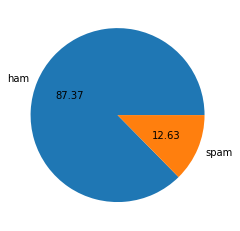

In [13]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [14]:
df['num_char'] =df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# nltk.download('punkt')
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


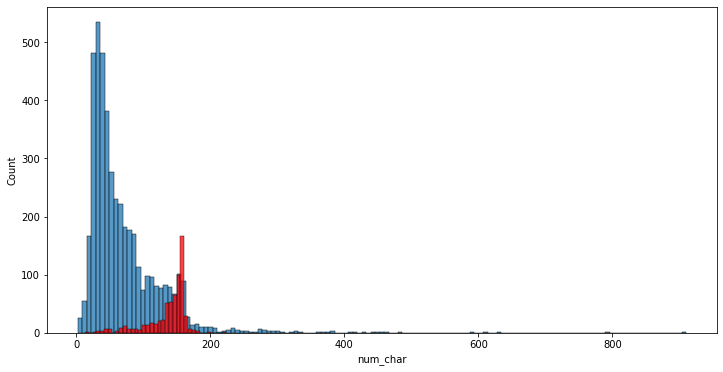

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char']) #ham
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')#spam
plt.show()

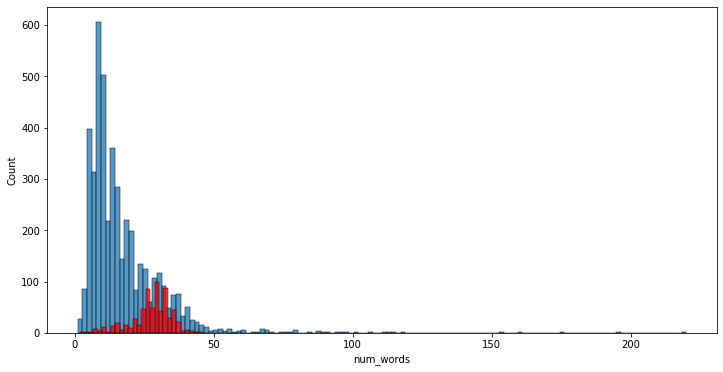

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')#spam
plt.show()

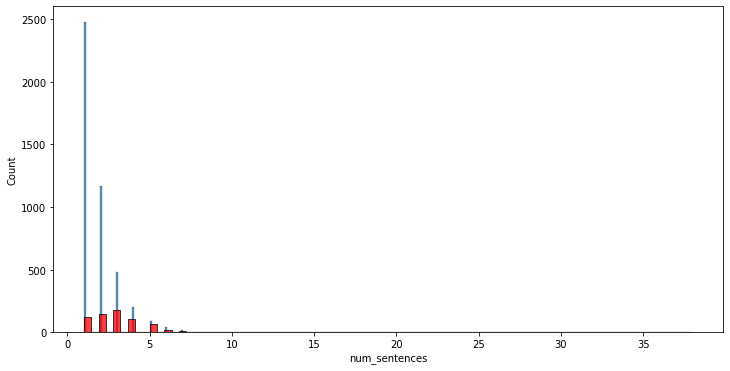

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) #ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')#spam
plt.show()

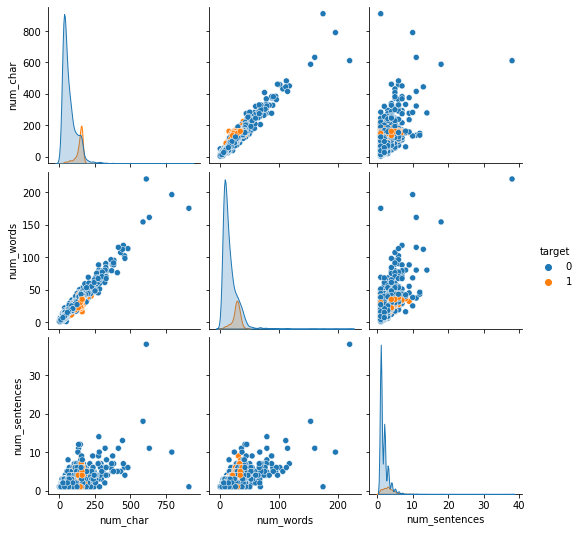

In [23]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

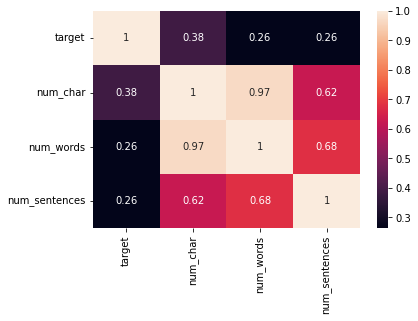

In [24]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentences']].corr(), annot = True)

# # Data Preprocessing

In [25]:
txt = 'HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%'
txt = txt.lower()
txt

'hello how are you priyanshu? hope you doing fine! i like to do machine learning%'

In [26]:
txt = nltk.word_tokenize(txt)
txt

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 '?',
 'hope',
 'you',
 'doing',
 'fine',
 '!',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning',
 '%']

In [27]:
x = []
for i in txt:
    if i.isalnum():
        x.append(i)
x

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 'hope',
 'you',
 'doing',
 'fine',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning']

In [28]:
# nltk.download('stopwords')
txt = x[:]  #so list are immutable 
x.clear()
for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machine', 'learning']

In [29]:
txt = x[:]
x.clear()
for i in txt:
    ps = PorterStemmer()
    i = ps.stem(i)
    x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machin', 'learn']

In [30]:
def tranform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    # removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # remove stopwords and punctuation:
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)


In [31]:
tranform_text('HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%')

'hello priyanshu hope fine like machin learn'

In [32]:
df['tranformed_text'] = df['text'].apply(tranform_text)
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [34]:
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


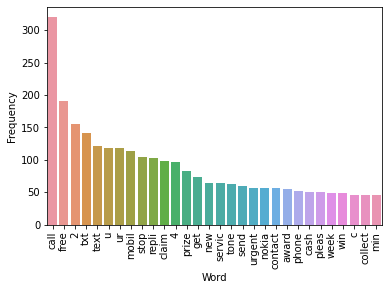

In [35]:
sns.barplot(x='Word', y='Frequency', data=df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [36]:
ham_corpus = []
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

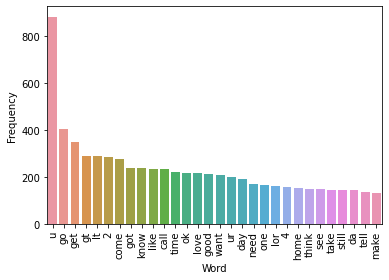

In [37]:
from collections import Counter
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_ham)
plt.xticks(rotation = 'vertical')
plt.show()

# # Model Building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()

In [39]:
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
X_cv = cv.fit_transform(df['tranformed_text']).toarray() 
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
X_cv.shape

(5169, 6708)

In [42]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_cv, y, test_size =0.2, random_state = 2)

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.8800773694390716

confusion matrix: 
[[792 104]
 [ 20 118]]

precision score:  0.5315315315315315


In [46]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9642166344294004

confusion matrix: 
[[871  25]
 [ 12 126]]

precision score:  0.8344370860927153


In [47]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

accuracy Score:  0.9700193423597679

confusion matrix: 
[[893   3]
 [ 28 110]]

precision score:  0.9734513274336283


In [48]:
tfidf = TfidfVectorizer()
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() 
X_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [50]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [51]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [52]:
tfidf = TfidfVectorizer(max_features = 3000)
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() 
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size =0.2, random_state = 2)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [53]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [54]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
9,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
8,GBDT,0.946809,0.919192
3,DT,0.927466,0.811881


In [55]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.927466


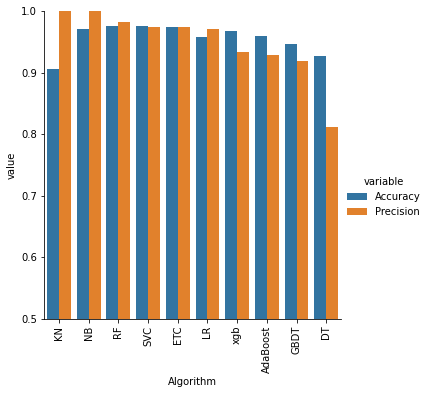

In [56]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Make Pipeline

In [57]:
df

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [58]:
X = df['tranformed_text']
y = df['target']

In [59]:
tfidf = TfidfVectorizer(max_features = 3000) 
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() 
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [60]:
def predict(X_pred):
    X_pred = tranform_text(X_pred)
    X_pred = [X_pred] 
    X_tf = tfidf.transform(X_pred).toarray()  
    predictions = mnb.predict(X_tf)
    if predictions == 1:
        print("The Message is Spam")
    else:
        print("The Message is not spam")

In [64]:
for index, row in df.iterrows():
    if row['target'] == 1:
        print(row['text'])
        


Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

You have 1 new message. Please call 08715205273
December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update VCo FREE on 08002986906 
Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly. 4 more go 2 www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply.
PRIVATE! Your 2003 Account Statement for 078
YOU VE WON! Your 4* Costa Del Sol Holiday or å£5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Costå£1.50/pm, Max10mins
Get your garden ready for summer with a FREE selection of summer bulbs and seeds worth å£33:50 only with The Scotsman this Saturday. To stop go2 notxt.co.uk
SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 auction today! Auction is FREE 2 join & take part! Txt NOKIA to 86021 now!
ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+
Our r

In [62]:
X_pred = input('Enter the Message: ')
predict(X_pred)

Enter the Message: hello
The Message is not spam


In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))